In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### &#11088; Visualisierung der Daten

### &#11088; Funktionen für die Visualisierung und Plotting

In [70]:
def Datensatz(CSVdatei):
    data = pd.read_csv(CSVdatei, delimiter= ";")
    return data
    

**Ringe** 

Die Funktion Ringe macht es, dass ein Datensatz eingelesen wird und dann ein Pie Chart ausgibt, welcher anzeigt welcher Ring am öftesten getroffen wurde.

In [71]:
def Ringe(Datensatz):
    try:
        Ring= Datensatz["Ringe"].value_counts()
    except: 
        print ("Dataframe ist kein Arrow Dataframe oder hat keine Spalte namens 'Ringe'")
    return Ring.plot.pie(figsize= (3,3), ylabel = "Treffer", xlabel = "",legend= True)

**Zielscheibe**

Die Funktion Zielscheibe macht es, dass ein Datensatz eingelesen wird und dann ein Scatterplot erstellt wird. 
Das besondere an der Funktion ist, dass der Plot auch anzeigt wo genau der Pfeil, in der Zielscheibe getroffen hat.

In [72]:
def Zielscheibe (Datensatz):
        if Datensatz["Typ Auflage"].max() == 122:

            Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Reds", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280)) 

            c11 = plt.Circle((0,0), 61, fill = False, color = 'yellow')             
            c12 = plt.Circle((0,0), 118, fill = False, color = 'red')
            c13 = plt.Circle((0,0), 162, fill = False, color = 'lightblue')
            c14 = plt.Circle((0,0), 217, fill = False, color = 'black')
            c15 = plt.Circle((0,0), 268, fill = False, color = 'black')

            for l in [c11, c12, c13, c14, c15]:
                Plot.add_patch(l)
        
        elif Datensatz["Typ Auflage"].max() == 40:

            Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 4,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Reds", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140)) 

            c31 = plt.Circle((0,0), 21, fill = False, color = 'yellow')     # 10       
            c32 = plt.Circle((0,0), 41, fill = False, color = 'red')        # 9
            c33 = plt.Circle((0,0), 59, fill = False, color = 'lightblue')  # 8
            c34 = plt.Circle((0,0), 73, fill = False, color = 'black')      # 7
            c35 = plt.Circle((0,0), 91, fill = False, color = 'black')      # 6
            c36 = plt.Circle((0,0), 118, fill = False, color = 'black')     # 5
            c37 = plt.Circle((0,0), 137, fill = False, color = 'black')     # 4

            for l in [c31, c32, c33, c34, c35, c36, c37]:
                Plot.add_patch(l)
        
        else: print ("Der Datensatz erhält keine Standardwerte für Typauflage")
        return Plot


**Treffer vergleiche zur Passe**

Soll zeigen ob es eine Rolle spiel wie lange man schon spielt. Das macht die Funktion indem Sie Passe und Treffer in mehrere Graphen steckt kommt drauf an wie viele spiele man schon gespielt hat.

In [73]:
def Trefferpassequote(a1= 0, a2= 0 , a3= 0 , a4= 0 ):

    try:
        Ringe1 = a1["Ringe"]

        Ringe2 = a2["Ringe"]

        Ringe3 = a3["Ringe"]

        Ringe4 = a4["Ringe"]

        fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (5,5), sharex= True,sharey= True)

        ax.plot(Ringe1, color = "red")
        ax2.plot(Ringe2, color = "lightblue")
        ax3.plot(Ringe3, color = "black")
        ax4.plot(Ringe4, color = "purple")
        ax4.set_xlabel("Passe")
        ax3.set_ylabel("durchschnittliche")
        ax2.set_ylabel("Punkte")
      
    except: print("Die Funktion braucht 4 Datensätze")

In [74]:
def AveragePunkteProPasse(Datensätze):

    averageliste=[]
    
    for l in range(1,Datensätze["Passe"].max()):

        new = Datensätze[Datensätze["Passe"] == l]

        sum = 0 
        try:
            for i in new["Ringe"]:
                sum = sum + i

            average = sum/new["Ringe"].count()
            averageliste.append(average)
        except: 
            averageliste.append(0)
            
        series = pd.Series(averageliste)
        Dataframe = pd.DataFrame({"Ringe": series.values})
        
    return Dataframe

In [75]:
arrows1 = Datensatz("arrows1.csv")
arrows2 = Datensatz("arrows2.csv")
arrows3 = Datensatz("arrows3.csv")
arrows4 = Datensatz("arrows4.csv")

&#11088; Einsicht der Plots

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

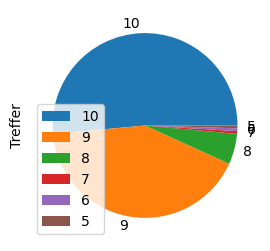

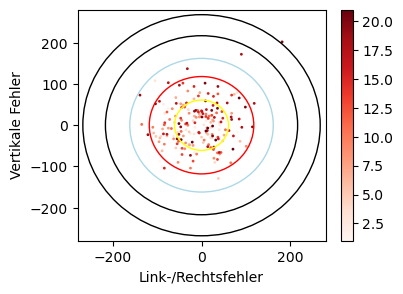

In [76]:
#Vergleich zweiter Datensatz
Ringe(arrows2)
Zielscheibe(arrows2)

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

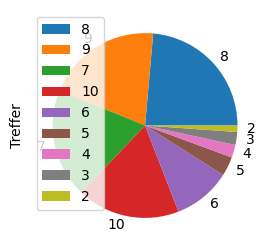

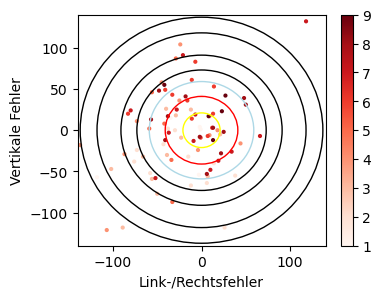

In [77]:
#Vergleich dritter Datensatz
Ringe(arrows3)
Zielscheibe(arrows3)

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

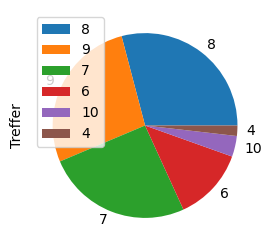

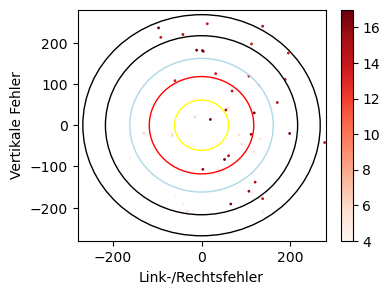

In [78]:
#Vergleich vierter Datensatz
Ringe(arrows4)
Zielscheibe(arrows4)

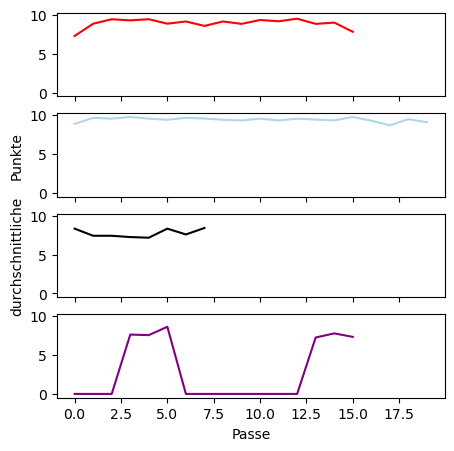

In [79]:
Trefferpassequote(AveragePunkteProPasse(arrows1),AveragePunkteProPasse(arrows2),AveragePunkteProPasse(arrows3),AveragePunkteProPasse(arrows4))

### &#11088; Interaktive Grafik

In [80]:
from ipywidgets import interact
import ipywidgets as widgets